Quang Vo

In [61]:
import sklearn
import numpy as np
import pandas as pd
#!python --version

#### Load data from file and preprocess data

In [62]:
# import data from text file into a dataframe
df = pd.read_csv(r'data1.txt', sep ="\t")
print(df)
print(df.shape)

      x         y  category
0   0.0 -0.432565       0.0
1   0.1 -1.665584       0.0
2   0.2  0.125332       0.0
3   0.3  0.287676       0.0
4   0.4 -1.146471       0.0
5   0.5  1.190916       1.0
6   0.6  1.189164       1.0
7   0.7 -0.037633       0.0
8   0.8  0.327292       0.0
9   0.9  0.174639       0.0
10  1.0 -0.186709       0.0
(11, 3)


In [63]:
# convert data frame into a numpy array
data = df.to_numpy()
data

array([[ 0.        , -0.43256481,  0.        ],
       [ 0.1       , -1.6655844 ,  0.        ],
       [ 0.2       ,  0.12533231,  0.        ],
       [ 0.3       ,  0.28767642,  0.        ],
       [ 0.4       , -1.1464714 ,  0.        ],
       [ 0.5       ,  1.1909155 ,  1.        ],
       [ 0.6       ,  1.1891642 ,  1.        ],
       [ 0.7       , -0.03763328,  0.        ],
       [ 0.8       ,  0.32729236,  0.        ],
       [ 0.9       ,  0.17463914,  0.        ],
       [ 1.        , -0.18670858,  0.        ]])

In [64]:
rows, cols = data.shape
print("Rows: ", rows)
print("Cols: ", cols)

# separate target (or label) from input
# we use slicing operator from Python
target = data[: , 2]  # class labels for data
print("Target:", target)
input = data[: , 0:cols-1] # input data
print("Input: \n", input)


Rows:  11
Cols:  3
Target: [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
Input: 
 [[ 0.         -0.43256481]
 [ 0.1        -1.6655844 ]
 [ 0.2         0.12533231]
 [ 0.3         0.28767642]
 [ 0.4        -1.1464714 ]
 [ 0.5         1.1909155 ]
 [ 0.6         1.1891642 ]
 [ 0.7        -0.03763328]
 [ 0.8         0.32729236]
 [ 0.9         0.17463914]
 [ 1.         -0.18670858]]


#### Create 80-20 train and test data

In [65]:
from sklearn import linear_model
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    input, target, test_size=0.20, random_state=42)

print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train: [[ 1.         -0.18670858]
 [ 0.2         0.12533231]
 [ 0.1        -1.6655844 ]
 [ 0.8         0.32729236]
 [ 0.4        -1.1464714 ]
 [ 0.7        -0.03763328]
 [ 0.3         0.28767642]
 [ 0.6         1.1891642 ]]
X_test: [[ 0.5         1.1909155 ]
 [ 0.         -0.43256481]
 [ 0.9         0.17463914]]
y_train: [0. 0. 0. 0. 0. 0. 0. 1.]
y_test: [1. 0. 0.]


#### Create, train, and test perceptron

In [66]:
clf = linear_model.Perceptron(tol = 1e-3, random_state = 0) # creates a perceptron
clf.fit(X_train, y_train) # train the perceptron


Perceptron()

In [67]:
print("Accuracy in training: ")
clf.score(X_train, y_train) # compute accuracy in train data

Accuracy in training: 


1.0

In [68]:
print("Accuracy in testing: ")
clf.score(X_test, y_test)

Accuracy in testing: 


1.0

#### Print predicted label and true label (target)

In [69]:
# Perceptron predicts class label for train data
predict_train = clf.predict(X_train)
print("Predicted and true label of train data")
[predict_train, y_train]

Predicted and true label of train data


[array([0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 1.])]

In [70]:
# shows params of the perceptron model
clf.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### Read the perceptron weights and plot the line they form along with plotting the 2D data

In [71]:
w0 = clf.intercept_ # bias, 1 row x 1 cols
weights = clf.coef_ # the other weights, 1 row x 2 cols
w = np.concatenate((w0, weights.flatten()), axis = 0)
w

array([-1.        , -1.4       ,  1.91045226])

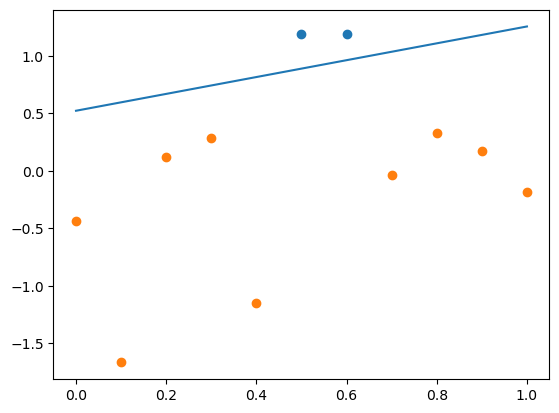

In [72]:
import matplotlib.pyplot as plt

# data has examples as rows, and last column is the label 0 or 1
def plot_points(data):
    xy = data[data[:,-1] == 1,:] # take all rows with last column 1
    plt.scatter(xy[:,0], xy[:,1])
    xy = data[data[:,-1] == 0,:] # take all rows with last column 0
    plt.scatter(xy[:,0], xy[:,1])

def plot_lines(min_x, max_x, w):
    x = np.linspace(min_x, max_x, 10)
    y = -w[0]/w[2] -x*w[1]/w[2]
    plt.plot(x,y)

plot_points(data)
plot_lines(0, 1, w)


#### Part B)

#### Load data from file and preprocess data



In [73]:
# import data from text file into a dataframe
df2 = pd.read_csv(r'data2.txt', sep ="\t", header=None)
print(df2)
print(df2.shape)

       0         1    2
0   0.00  0.015274  0.0
1   0.05  0.746786  0.0
2   0.10  0.445096  0.0
3   0.15  0.931815  0.0
4   0.20  0.465994  0.0
5   0.25  0.418649  0.0
6   0.30  0.846221  0.0
7   0.35  0.525153  1.0
8   0.40  0.202647  0.0
9   0.45  0.672137  1.0
10  0.50  0.838118  0.0
11  0.55  0.019640  0.0
12  0.60  0.681277  1.0
13  0.65  0.379481  1.0
14  0.70  0.831796  0.0
15  0.75  0.502813  0.0
16  0.80  0.709471  0.0
17  0.85  0.428892  0.0
18  0.90  0.304617  0.0
19  0.95  0.189654  0.0
20  1.00  0.193431  0.0
(21, 3)


In [74]:
# convert data frame into a numpy array
data2 = df2.to_numpy()
data2

array([[0.        , 0.01527393, 0.        ],
       [0.05      , 0.74678568, 0.        ],
       [0.1       , 0.44509643, 0.        ],
       [0.15      , 0.93181458, 0.        ],
       [0.2       , 0.46599434, 0.        ],
       [0.25      , 0.41864947, 0.        ],
       [0.3       , 0.84622142, 0.        ],
       [0.35      , 0.5251525 , 1.        ],
       [0.4       , 0.20264736, 0.        ],
       [0.45      , 0.67213747, 1.        ],
       [0.5       , 0.83811845, 0.        ],
       [0.55      , 0.01963951, 0.        ],
       [0.6       , 0.68127716, 1.        ],
       [0.65      , 0.37948102, 1.        ],
       [0.7       , 0.83179602, 0.        ],
       [0.75      , 0.50281288, 0.        ],
       [0.8       , 0.70947139, 0.        ],
       [0.85      , 0.42889237, 0.        ],
       [0.9       , 0.30461737, 0.        ],
       [0.95      , 0.18965375, 0.        ],
       [1.        , 0.19343116, 0.        ]])

In [75]:
rows2, cols2 = data2.shape
print("Rows: ", rows2)
print("Cols: ", cols2)

# separate target (or label) from input
# we use slicing operator from Python
target2 = data2[: , cols2-1]  # class labels for data
print("Target:", target2)
input2 = data2[: , 0:cols2-1] # input data
print("Input: \n", input2)

Rows:  21
Cols:  3
Target: [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Input: 
 [[0.         0.01527393]
 [0.05       0.74678568]
 [0.1        0.44509643]
 [0.15       0.93181458]
 [0.2        0.46599434]
 [0.25       0.41864947]
 [0.3        0.84622142]
 [0.35       0.5251525 ]
 [0.4        0.20264736]
 [0.45       0.67213747]
 [0.5        0.83811845]
 [0.55       0.01963951]
 [0.6        0.68127716]
 [0.65       0.37948102]
 [0.7        0.83179602]
 [0.75       0.50281288]
 [0.8        0.70947139]
 [0.85       0.42889237]
 [0.9        0.30461737]
 [0.95       0.18965375]
 [1.         0.19343116]]


#### Create 80-20 train and test data

In [76]:
from sklearn import linear_model
from sklearn import model_selection

X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(input2, target2, test_size=0.20, random_state=42)

print("X_train2:", X_train2)
print("X_test2:", X_test2)
print("y_train2:", y_train2)
print("y_test2:", y_test2)

X_train2: [[0.25       0.41864947]
 [0.55       0.01963951]
 [0.15       0.93181458]
 [0.9        0.30461737]
 [0.8        0.70947139]
 [0.65       0.37948102]
 [0.1        0.44509643]
 [0.45       0.67213747]
 [1.         0.19343116]
 [0.2        0.46599434]
 [0.6        0.68127716]
 [0.35       0.5251525 ]
 [0.5        0.83811845]
 [0.7        0.83179602]
 [0.95       0.18965375]
 [0.3        0.84622142]]
X_test2: [[0.         0.01527393]
 [0.85       0.42889237]
 [0.75       0.50281288]
 [0.05       0.74678568]
 [0.4        0.20264736]]
y_train2: [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
y_test2: [0. 0. 0. 0. 0.]


#### Create, train, and test perceptron

In [77]:
clf2 = linear_model.Perceptron(tol = 1e-3, random_state = 0) # creates a perceptron
clf2.fit(X_train2, y_train2) # train the perceptron


Perceptron()

In [78]:
print("Accuracy in training: ")
clf2.score(X_train2, y_train2) # compute accuracy in train data

Accuracy in training: 


0.75

In [79]:
print("Accuracy in testing: ")
clf2.score(X_test2, y_test2) # compute accuracy in train data

Accuracy in testing: 


1.0

#### Print predicted label and true label (target)

In [80]:
# Perceptron predicts class label for train data
predict_train2 = clf2.predict(X_train2)
print("Predicted and true label of train data")
[predict_train2, y_train2]

Predicted and true label of train data


[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.])]

In [81]:
# shows params of the perceptron model
clf2.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### Read the perceptron weights and plot the line they form along with plotting the 2D data

In [82]:
w02 = clf2.intercept_ # bias, 1 row x 1 cols
weights2 = clf2.coef_ # the other weights, 1 row x 2 cols
w2 = np.concatenate((w02, weights2.flatten()), axis = 0)
w2

array([-2.        ,  0.25      , -0.09553077])

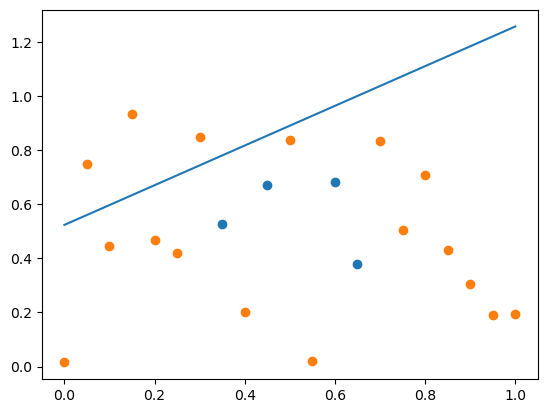

In [83]:
import matplotlib.pyplot as plt

# data has examples as rows, and last column is the label 0 or 1
def plot_points(data2):
    xy = data2[data2[:,-1] == 1,:] # take all rows with last column 1
    plt.scatter(xy[:,0], xy[:,1])
    xy = data2[data2[:,-1] == 0,:] # take all rows with last column 0
    plt.scatter(xy[:,0], xy[:,1])

def plot_lines(min_x, max_x, w):
    x = np.linspace(min_x, max_x, 10)
    y = -w[0]/w[2] -x*w[1]/w[2]
    plt.plot(x,y)

plot_points(data2)
plot_lines(0, 1, w)

the reason why the perceptron cannot easily classify the data is because there is no linearly separable line that can split the data into two classes